pip install seaborn

In [1]:
import seaborn as sns
from  matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd 
from pylab import mpl 
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

# 单一变量

## distplot()--直方图

<Figure size 720x216 with 0 Axes>

array([ 0.03365436, -0.47020165, -0.9897372 ])

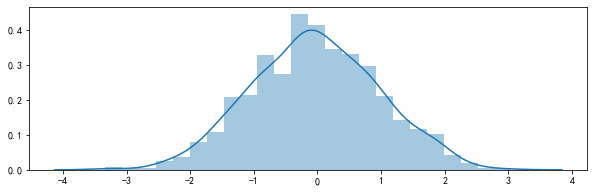

In [13]:
plt.figure(figsize=(10,3))
x1=np.random.normal(size=1000)
x1[:3]
sns.distplot(x1)
#默认直方图和kde图----hist=True,kde=True,


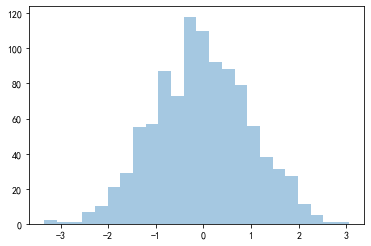

In [14]:
sns.distplot(x1,kde=False)

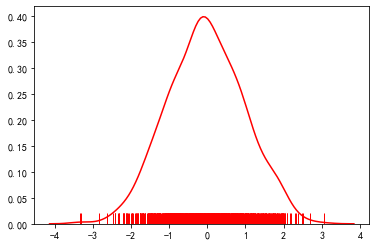

In [17]:
sns.distplot(x1,hist=False,rug=True,color='r')

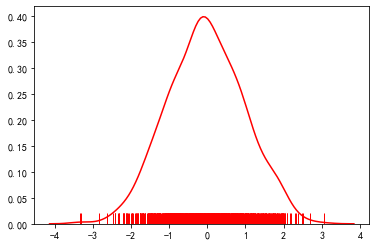

In [19]:
sns.distplot(x1,bins=10,hist=False,rug=True,color='r')

## distplot（）--拟合参数分布
通过设置fit参数进行相关拟合

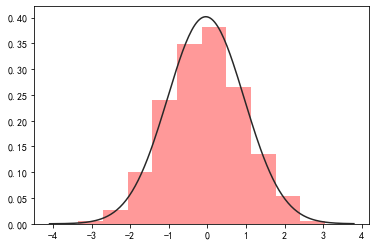

In [23]:
# 利用scipy子模块stats中的分布函数gamma（伽玛分布）
sns.distplot(x1,bins=10,kde=False,fit=st.gamma,color='r')  


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1680: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


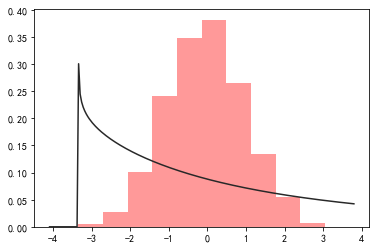

In [27]:
sns.distplot(x1,bins=10,kde=False,fit=st.f,color='r')  

## kdeplot（）--核密度

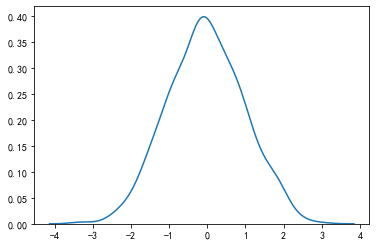

In [20]:
sns.kdeplot(x1)

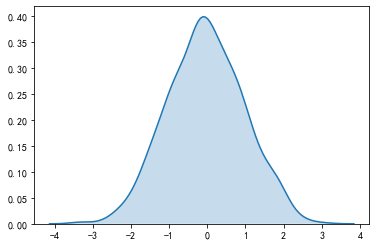

In [21]:
sns.kdeplot(x1,shade=True)  #添加阴影

# 双变量分布

In [109]:
df1=pd.DataFrame({'x':np.random.randn(500),'y':np.random.randn(500)})
df1[:3]

,x,y
0,-0.223684,0.247766
1,0.933972,0.698672
2,1.184512,0.095463


In [30]:
df2=pd.DataFrame({'x':np.random.randn(500),'y':np.random.randint(1,100,500)})
df2[:3]

,x,y
0,1.223135,25
1,1.738105,46
2,-0.658404,21


## jointplot( )
用于分析特征与特征之间的关系
 x,y, data=None,   kind='scatter', stat_func=None,  color=None,  height=6,  ratio=5, space=0.2,
 
 kind可为： "scatter" | "reg" | "resid" | "kde" | "hex" 

### kind='scatter'-默认为散布图
适用于数据量比较少的

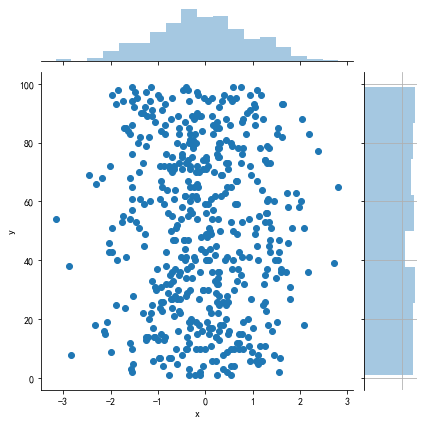

In [34]:
sns.jointplot(x='x',y='y',data=df2)  #中间区域默认为散点图
plt.grid()

### kind='hex'--二维直方图
可以清晰的看到数据量的多少--适用于数据量比较多的

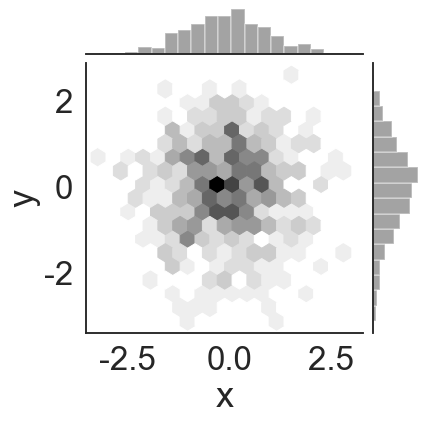

In [119]:
sns.set_style('white')
sns.jointplot(x='x',y='y',data=df2,kind='hex',color='k')  #中间区域默认为六边形散点图,颜色越深代表附近的点越多


### kind='kde'--核密度估计

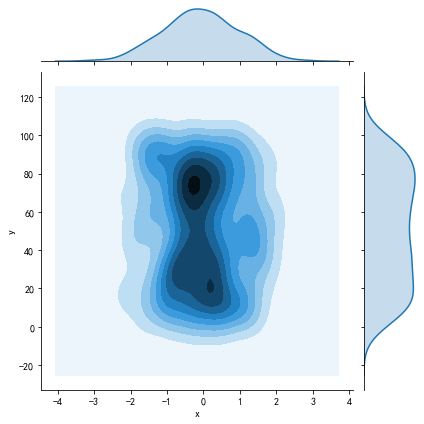

In [43]:
sns.jointplot(x='x',y='y',data=df2,kind='kde')  #中间区域默认为核密度

## pairplot（）-数据集中变量 关系图

In [49]:
#利用sns中自带的数据集进行测试---https://github.com/mwaskom/seaborn-data网站中有相关数据类型

dataset=sns.load_dataset('tips')
dataset.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


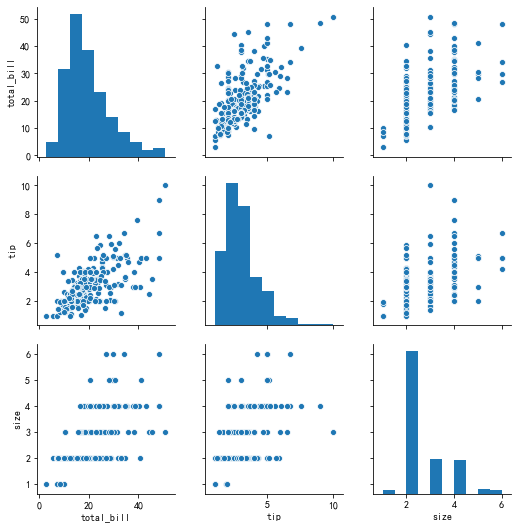

In [50]:
#展示出total_bill  tip size 三个变量之间的关系，对角线为自己对自己的
sns.pairplot(dataset)

## 类别散点图
### stripplot--数据会有重叠

In [2]:
exercise=sns.load_dataset('exercise')
exercise.head(3)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest


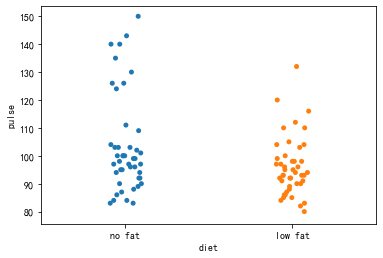

In [91]:
sns.stripplot(x='diet',y='pulse',data=exercise)

###   jitter=True 实现数据偏移，不重叠显示

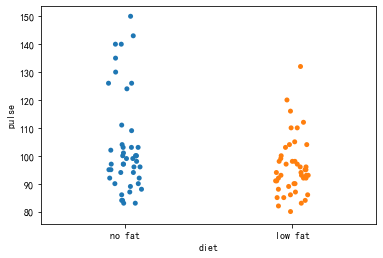

In [36]:
sns.stripplot(x='diet',y='pulse',data=exercise,jitter=True)

###  hue 参数指定子类别

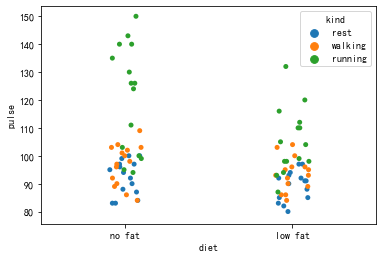

In [90]:
sns.stripplot(x='diet',y='pulse',data=exercise,hue='kind')

### swarmplot--数据不会有重叠 
更推荐

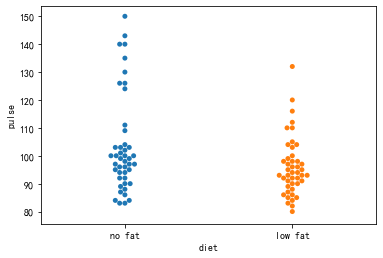

In [88]:
sns.swarmplot(x='diet',y='pulse',data=exercise)

## 类别内数据分布
hue指定子类类别

### boxplot---盒子图

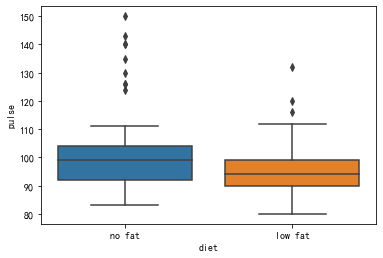

In [50]:
sns.boxplot(x='diet',y='pulse',data=exercise)

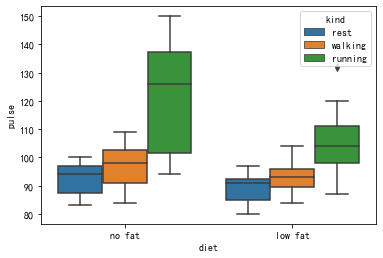

In [93]:
sns.boxplot(x='diet',y='pulse',data=exercise,hue='kind')

#### orient参数设置横、竖向
"v"竖向，'h'横向

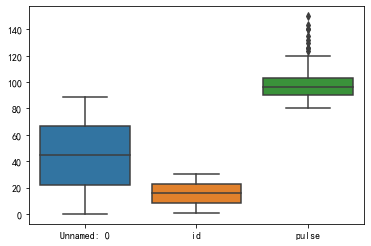

In [48]:
sns.boxplot(data=exercise,orient = "v")

### violinplot--小提琴图
通过宽窄代表数据量的多少

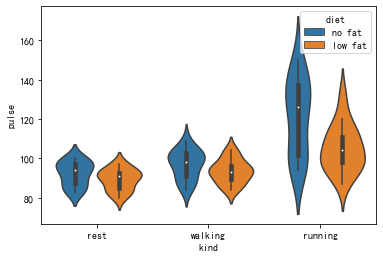

In [16]:
sns.violinplot(x='kind',y='pulse',data=exercise,hue='diet')

####  inner参数
=None时不显示中间的竖线

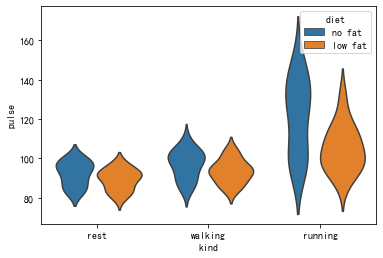

In [22]:
sns.violinplot(x='kind',y='pulse',data=exercise,hue='diet',inner=None)

#### split参数-左右两侧显示数据
使用split时，hue中的数据必须只有两类，否则会报错

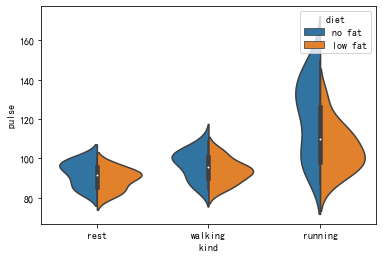

In [15]:
sns.violinplot(x='kind',y='pulse',data=exercise,hue='diet',split=True)

### 图形合体

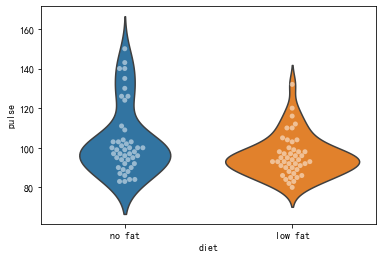

In [21]:
sns.violinplot(x='diet',y='pulse',data=exercise,inner=None)
sns.swarmplot(x='diet',y='pulse',data=exercise,color='w',alpha=0.5)

## 类别内统计图

### barplot--柱状图

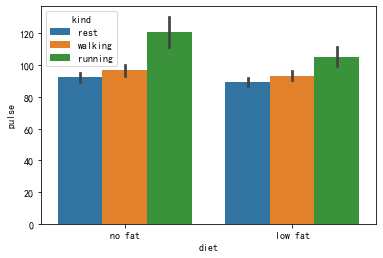

In [99]:
sns.barplot(x='diet',y='pulse',data=exercise,hue='kind')


### pointplot--点图(描述差异性)
描述变量间的差异性的时候用点图

palette设置颜色，markers设置点的形状，linestyles线的样式

#### markers参数

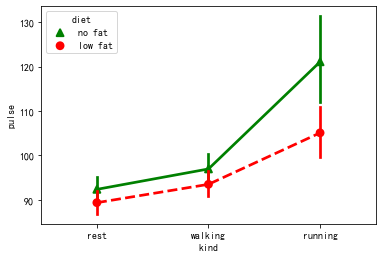

In [28]:
sns.pointplot(x='kind',y='pulse',hue='diet',data=exercise,palette={'no fat':'g','low fat':'r'}
              ,markers=['^','o'],linestyles=['-','--'])

## regplot（）--回归
regplot和lmplot均可以绘制回归分析图，推荐使用regplot

In [4]:
tips=sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


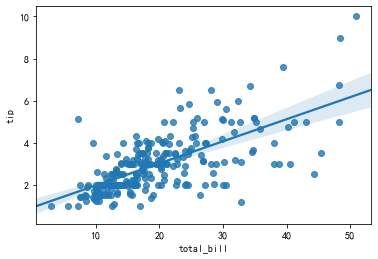

In [5]:
sns.regplot(x='total_bill',y='tip',data=tips)

### x_jitter参数，添加一个随机的浮动
因为size是整数，不利于做回归分析，需要在上面添加一个随机的浮动


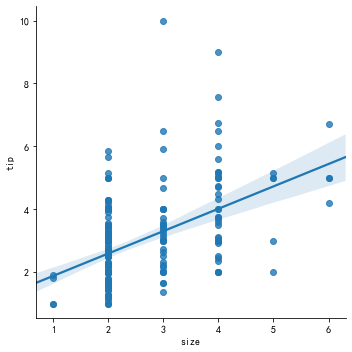

In [7]:
sns.lmplot(x='size',y='tip',data=tips)

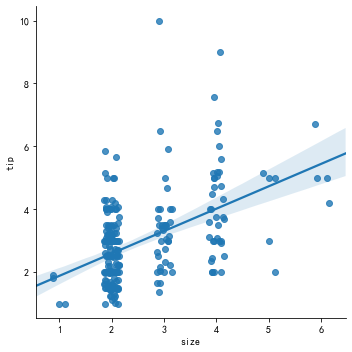

In [8]:
sns.lmplot(x='size',y='tip',x_jitter=0.15,data=tips)

## factorplot--多层面板分类图
在factorplot中可以画任何类型的图，设置kind参数即可

### 默认为点图-point

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


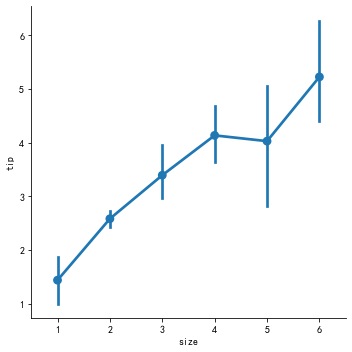

In [45]:
tips=sns.load_dataset('tips')
tips.head(3)
sns.tips=sns.load_dataset('tips')
sns.factorplot(x='size',y='tip',data=tips)

### kind='bar'改变图形的样子

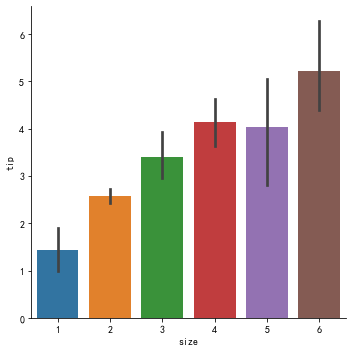

In [44]:
sns.factorplot(x='size',y='tip',data=tips,kind='bar')

### col参数设置维度

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


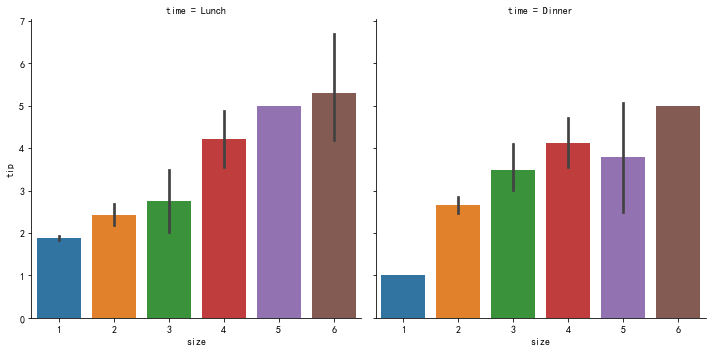

In [51]:
sns.factorplot(x='size',y='tip',data=tips,kind='bar',col='time')

### size和aspect参数
aspect设置宽和高的比，size为大小

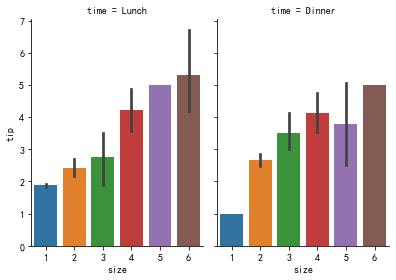

In [62]:
sns.factorplot(x='size',y='tip',data=tips,kind='bar',col='time',size=4,aspect=0.7)

## FacetGrid--作所有图

In [67]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


### 创建空白画布
#根据col中传入的信息，创建相应数量的空白画布，因为time有两个元素，Dinner  Lunch，所以有两个图形

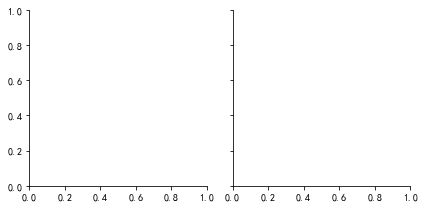

In [65]:
g=sns.FacetGrid(tips,col='time')


### map函数  进行绘图

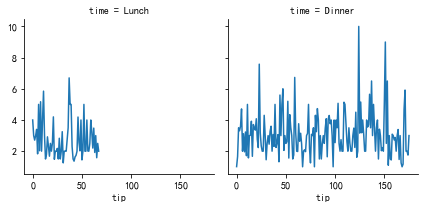

In [69]:
g=sns.FacetGrid(tips,col='time')
g.map(plt.plot,'tip')

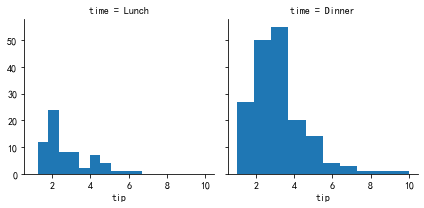

In [70]:
g=sns.FacetGrid(tips,col='time')
g.map(plt.hist,'tip')

#### fit_reg参数
搭配sns.regplot使用，是否显示回归线

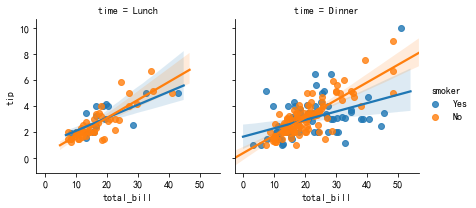

In [79]:
g=sns.FacetGrid(tips,col='time',hue='smoker')
g.map(sns.regplot,'total_bill','tip',fit_reg=True)
g.add_legend()  #显示右边的smoker图例

#### 其他参数

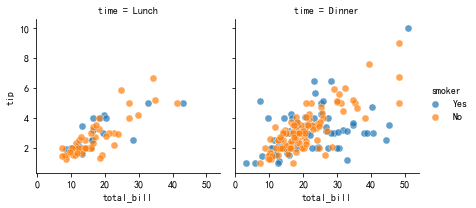

In [91]:
g=sns.FacetGrid(tips,col='time',hue='smoker')
g.map(plt.scatter,'total_bill','tip',s=50,alpha=0.7,linewidth=0.5,edgecolor='white')
g.add_legend()  #显示右边的smoker图例

### add_legend()添加图例
搭配hue参数进行使用，显示出hue中的信息

In [71]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


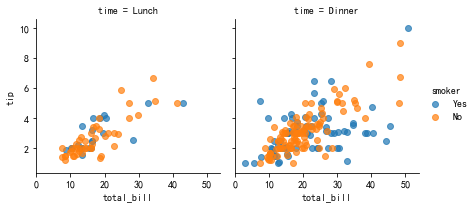

In [75]:
g=sns.FacetGrid(tips,col='time',hue='smoker')
g.map(plt.scatter,'total_bill','tip',alpha=0.7)
g.add_legend()  #显示右边的smoker图例

### size和aspect进行参数设置

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


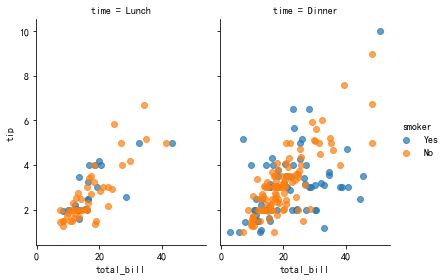

In [81]:
g=sns.FacetGrid(tips,col='time',hue='smoker',size=4,aspect=0.7)
g.map(plt.scatter,'total_bill','tip',alpha=0.7)
g.add_legend()  #显示右边的smoker图例

### palette参数--设置色板

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


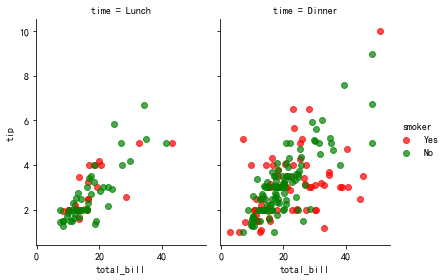

In [89]:
pal={'No':'g','Yes':'r'}
g=sns.FacetGrid(tips,col='time',hue='smoker',size=4,aspect=0.7,palette=pal)
g.map(plt.scatter,'total_bill','tip',alpha=0.7)
g.add_legend()  #显示右边的smoker图例

### hue_kws参数--设置marker

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


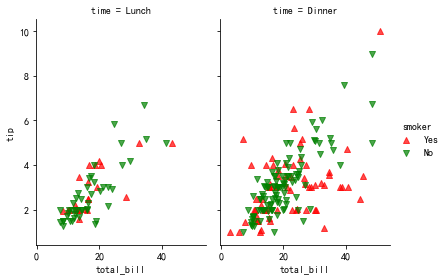

In [92]:
pal={'No':'g','Yes':'r'}
g=sns.FacetGrid(tips,col='time',hue='smoker',size=4,aspect=0.7,palette=pal,hue_kws={'marker':['^','v']})
g.map(plt.scatter,'total_bill','tip',alpha=0.7)
g.add_legend()  

## PairGrid-作相关图
### map_diag-设置对角线的图
### map_offdiag-设置非对角线的图

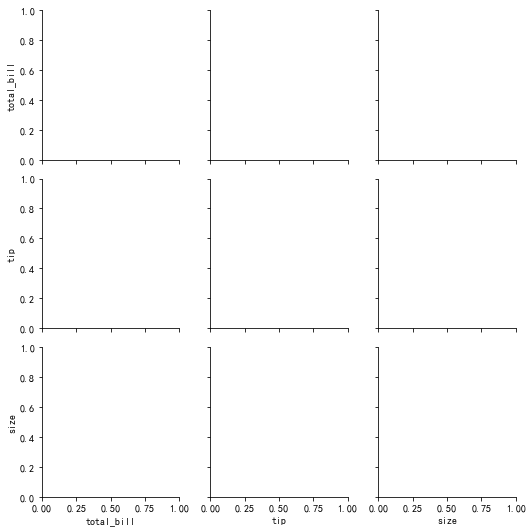

In [93]:
g=sns.PairGrid(tips)

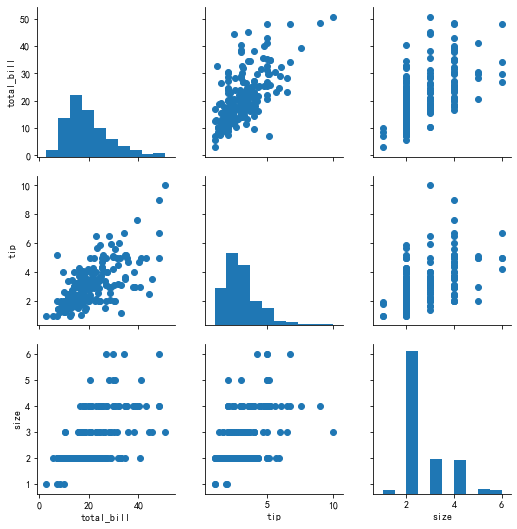

In [94]:
g=sns.PairGrid(tips)
g.map_diag(plt.hist)   #设置对角线的图
g.map_offdiag(plt.scatter)   #设置非对角线的图

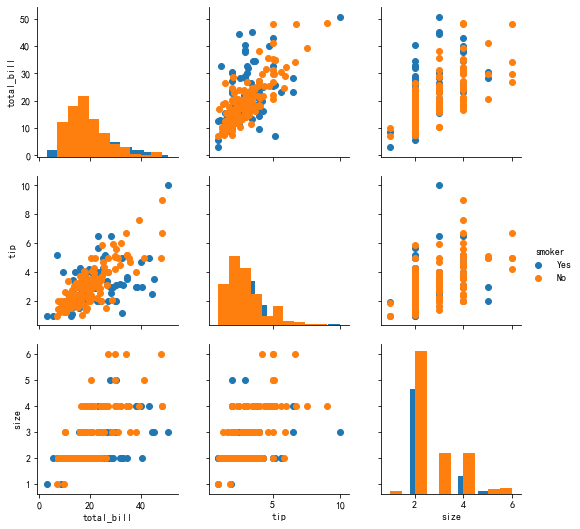

In [97]:
g=sns.PairGrid(tips,hue='smoker')
g.map_diag(plt.hist)   #设置对角线的图
g.map_offdiag(plt.scatter)   #设置非对角线的图
g.add_legend() 

### vars参数-取部分元素

In [98]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


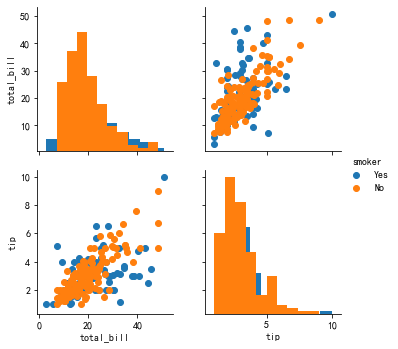

In [99]:
g=sns.PairGrid(tips,hue='smoker',vars=['total_bill','tip'])
g.map_diag(plt.hist)   #设置对角线的图
g.map_offdiag(plt.scatter)   #设置非对角线的图
g.add_legend() 

## heatmap--热图
在相关程度上用的较多

不同的颜色代表对应位置数据的大小，xy轴上的数字为数据位置（1,1）为df中（1,1）位置对应的颜色

In [100]:
df=np.random.rand(3,3)
df

array([[0.58442394, 0.61762946, 0.98779933],
       [0.99365515, 0.59927523, 0.73731481],
       [0.34029802, 0.26641486, 0.29186971]])

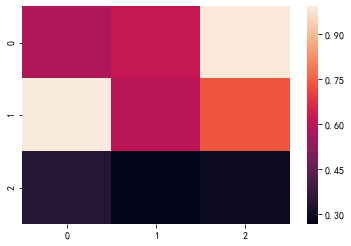

In [101]:
sns.heatmap(df)

### vmin和vmax设置刻度最大值和最小值

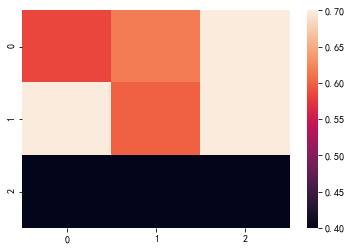

In [106]:
sns.heatmap(df,vmin=0.4,vmax=0.7)

### center参数设置中间刻度，
center=0表示0以下的为一个颜色，0以上的是另外颜色

array([[-1.55539535, -0.35852297, -0.57255986],
       [ 0.66678359, -0.55534147,  0.1851554 ],
       [-0.92064582, -0.23526616,  0.65373787]])

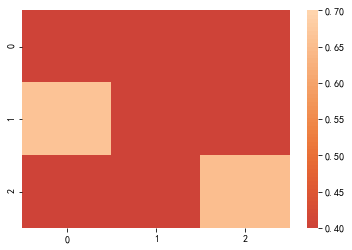

In [108]:
df=np.random.randn(3,3)
df
sns.heatmap(df,vmin=0.4,vmax=0.7,center=0)

### annot参数-添加数据标签

In [111]:
tips=sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.433333,2.100000,2.644068,2.810345
Female,2.468750,2.111111,2.250000,2.944444


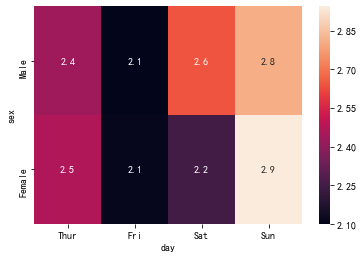

In [128]:
tips=sns.load_dataset('tips')
tips=tips.pivot_table(index='sex',columns='day',values='size')
tips.head(3)
sns.heatmap(tips,annot=True)

### fmt='1.3g' 设置标签样式

day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.433333,2.100000,2.644068,2.810345
Female,2.468750,2.111111,2.250000,2.944444


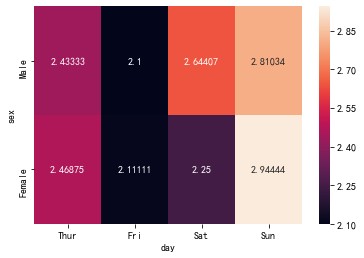

In [133]:
tips=sns.load_dataset('tips')
tips=tips.pivot_table(index='sex',columns='day',values='size')
tips.head(3)
sns.heatmap(tips,annot=True,fmt='g')

### linewidths设置格之间的间距

day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.433333,2.100000,2.644068,2.810345
Female,2.468750,2.111111,2.250000,2.944444


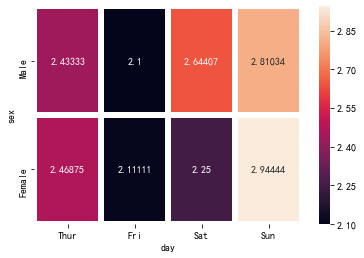

In [134]:
tips=sns.load_dataset('tips')
tips=tips.pivot_table(index='sex',columns='day',values='size')
tips.head(3)
sns.heatmap(tips,annot=True,fmt='g',linewidths=5)

### cmap 修改颜色风格

day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.433333,2.100000,2.644068,2.810345
Female,2.468750,2.111111,2.250000,2.944444


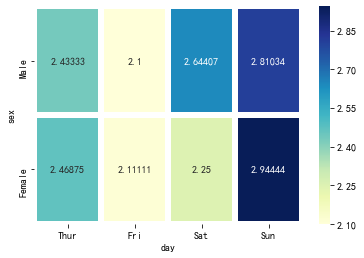

In [140]:
tips=sns.load_dataset('tips')
tips=tips.pivot_table(index='sex',columns='day',values='size')
tips.head(3)
sns.heatmap(tips,annot=True,fmt='g',linewidths=5,cmap="YlGnBu")

In [ ]:
sns.heatmap()